In [64]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from nltk.tokenize import word_tokenize
import pandas as pd
df = pd.read_csv('/content/Corona_NLP_test.csv')
missing_values = df.isnull().sum()
print(missing_values)


UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


In [66]:
# Tokenize each tweet in the OriginalTweet column and store the tokens in a new column
df['TokenizedTweet'] = df['OriginalTweet'].apply(lambda x: word_tokenize(x.lower()))

# Print the first 5 rows of the DataFrame to check the new column
print(df.head(5))


   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                      TokenizedTweet  
0  [trending, :, new, yorkers, encounter, empty, ...  
1  [when, i, could, n't, find, hand, sanitizer, a...  
2  [find, out, ho

In [67]:
df.to_csv("tokenized_dataset.csv", index=False)


In [72]:
from nltk.corpus import stopwords


# Load stop words
stop_words = set(stopwords.words('english'))

# Define a function to clean the tweets
def clean_tweet(tweet):
    # Tokenize the tweet
    words = word_tokenize(tweet)
    # Remove stop words
    words = [word for word in words if not word.lower() in stop_words]
    # Join the remaining words back into a string
    tweet = ' '.join(words)
    return tweet

# Apply the function to the OriginalTweet column and store the results in a new column
df['clean tweets'] = df['OriginalTweet'].apply(clean_tweet)

# Print the first 5 rows of the updated dataframe
print(df.head())



   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                      TokenizedTweet  \
0  [trending, :, new, yorkers, encounter, empty, ...   
1  [when, i, could, n't, find, hand, sanitizer, a...   
2  [find, out,

In [69]:
df.to_csv("resulting_dataset.csv", index=False)


In [73]:
from nltk.probability import FreqDist
# Tokenize the text in the OriginalTweet column
tokenized_tweets = df['clean tweets'].apply(word_tokenize)
# Create a frequency distribution of the words
fdist = FreqDist([word.lower() for tweet in tokenized_tweets for word in tweet])
# Print the 10 most common words and their frequencies
print(fdist.most_common(10))


[('#', 7857), ('.', 4896), (',', 3528), ('?', 2597), (':', 2413), ('https', 1824), ('covid_19', 1541), ('coronavirus', 1516), ('food', 1332), ('@', 1242)]


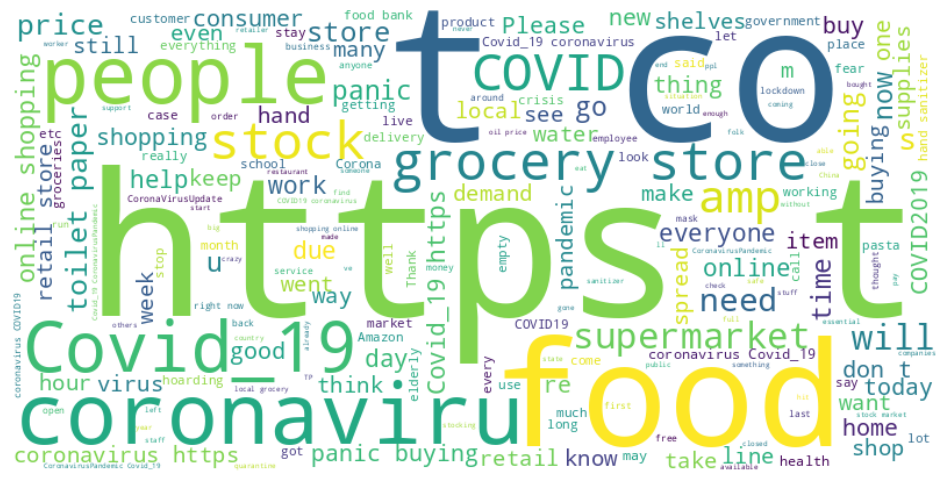

In [74]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the tweets into a single string
text = " ".join(df['OriginalTweet'].dropna().astype(str))

# Generate a word cloud from the text
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', random_state= 10).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




